In [1]:
%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important }</style>'))

Autosave disabled


# Linear Regression: Rounding and Subclassing

In this notebook we investigate the influence of <em style="color:blue;">rounding</em> and <em style="color:blue;">subclassing</em> on linear regression.  To begin, we import all the libraries we need.

In [2]:
import numpy                as np
import matplotlib.pyplot    as plt
import seaborn              as sns
import sklearn.linear_model as lm

We will work with artificially generated data.  The independent variable `X` is a `numpy` array 
of $\texttt{N}=400$ random numbers that have a <em style="color:blue;">normal</em> distribution with 
mean $\mu = 10$ and standard deviation $1$.  The data is created from random numbers.
In order to be able to reproduce our results, we use the method `numpy.random.seed`. 

In [3]:
np.random.seed(1)
N = 400 
𝜇 = 10
X = np.random.randn(N) + 𝜇

The dependent variable `Y` is created by adding some noise to the independent variable `X`.  This noise is 
<em style="color:blue;">normally</em> distributed with mean $0$ and standard deviation $0.5$.

In [4]:
noise = 0.5 * np.random.randn(len(X))
Y = X + noise

We build a linear model for `X` and `Y`.

In [5]:
model = lm.LinearRegression()

In order to use **SciKit-Learn** we have to reshape the array X into a matrix.

In [6]:
X = np.reshape(X, (len(X), 1))

We train the model and compute its score.

In [7]:
M = model.fit(X, Y)
M.score(X, Y)

0.7940534903284886

In order to plot the data together with the linear model, we extract the coefficients.

In [8]:
ϑ0 = M.intercept_
ϑ1 = M.coef_[0]

We plot `Y` versus `X` and the linear regression line.

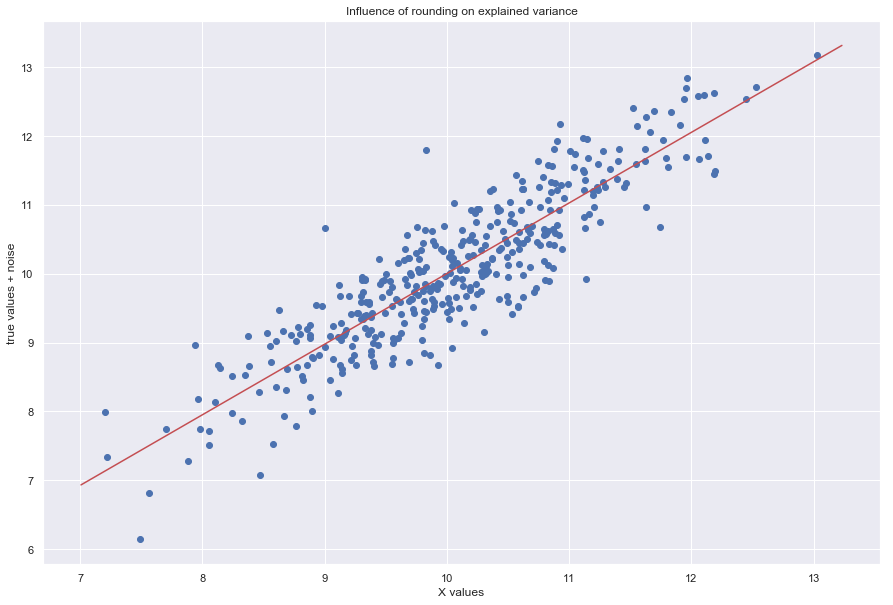

In [9]:
xMax = np.max(X) + 0.2
xMin = np.min(X) - 0.2
%matplotlib inline
plt.figure(figsize=(15, 10))
sns.set(style='darkgrid')
plt.scatter(X, Y, c='b') # 'b' is blue color
plt.xlabel('X values')
plt.ylabel('true values + noise')
plt.title('Influence of rounding on explained variance')
plt.show(plt.plot([xMin, xMax], [ϑ0 + ϑ1 * xMin, ϑ0 + ϑ1 * xMax], c='r'))

As we want to study the effect of <em style="color:blue;">rounding</em>, the values of the dependent variable `X` are rounded to the nearest integer.  To this end, the values are transformed to another unit, rounded and then transformed back to the original unkit.  This way we can investigate how the performance of linear regression  degrades if the precision of the measurements of the independent variable is low.

In [10]:
X = np.round(X * 0.8) / 0.8

We create a new <em style="color:blue;">linear model</em>, fit it to the data and compute its score.

In [11]:
model = lm.LinearRegression()
M = model.fit(X, Y)
M.score(X, Y)

0.6965503987965855

We can see that the performance of the linear model has degraded considerably.

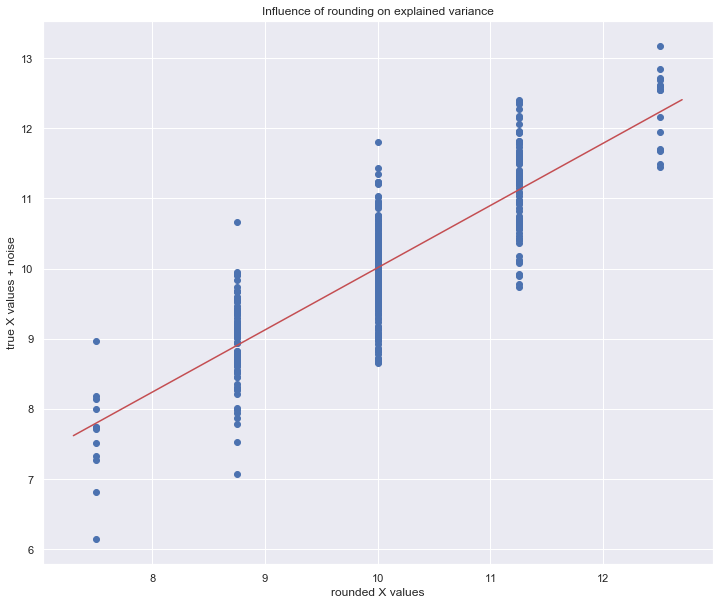

In [12]:
ϑ0 = M.intercept_
ϑ1 = M.coef_[0]
xMax = max(X) + 0.2
xMin = min(X) - 0.2
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
plt.scatter(X, Y, c='b')
plt.plot([xMin, xMax], [ϑ0 + ϑ1 * xMin, ϑ0 + ϑ1 * xMax], c='r')
plt.xlabel('rounded X values')
plt.ylabel('true X values + noise')
plt.title('Influence of rounding on explained variance')
plt.show()

Next, we investigate the effect of <em style="color:blue;">subclassing</em>. We will only keep those values such that $X > 11$. 

In [13]:
X.shape

(400, 1)

In [14]:
selectorX = (X > 11)
selectorY = np.reshape(selectorX, (N,))
XS = X[selectorX]
XS = np.reshape(XS, (len(XS), 1))
YS = Y[selectorY]

Again, we fit a linear model.

In [15]:
model = lm.LinearRegression()
M = model.fit(XS, YS)
M.score(XS, YS)

0.3006619504584453

We see that the performance of linear regression has degraded considerably.  Let's plot this.

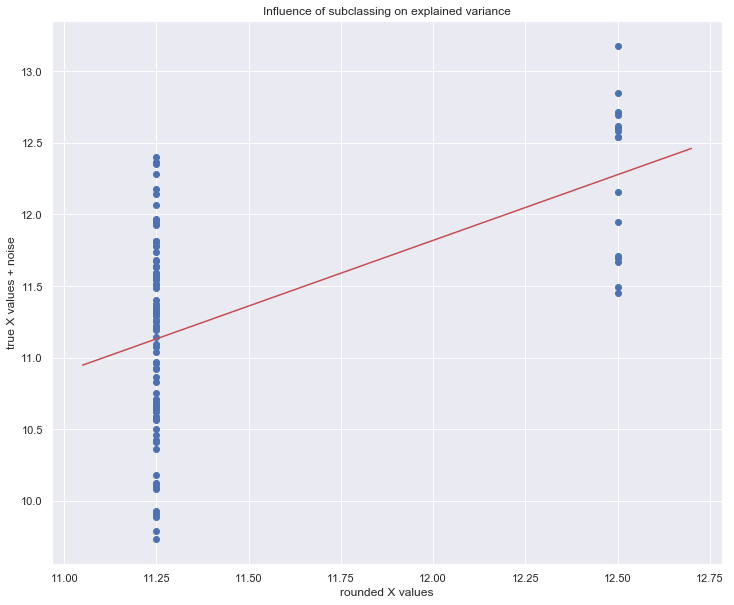

In [16]:
ϑ0 = M.intercept_
ϑ1 = M.coef_[0]
xMax = max(XS) + 0.2
xMin = min(XS) - 0.2
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
plt.scatter(XS, YS, c='b')
plt.plot([xMin, xMax], [ϑ0 + ϑ1 * xMin, ϑ0 + ϑ1 * xMax], c='r')
plt.xlabel('rounded X values')
plt.ylabel('true X values + noise')
plt.title('Influence of subclassing on explained variance')
plt.show()